In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cookies = pd.read_csv('clean_cookies.csv')

During data cleaning we identified some potential outliers, these are the ones we will drop first

# pH

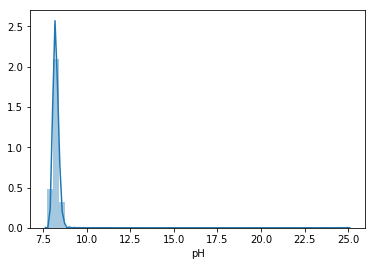

In [3]:
sns.distplot(cookies['pH'])

In [4]:
cookies['pH'].describe()

count    5175.000000
mean        8.222066
std         0.283779
min         7.720000
25%         8.110000
50%         8.210000
75%         8.320000
max        25.000000
Name: pH, dtype: float64

In [5]:
cookies = cookies[cookies['pH'] < 10]

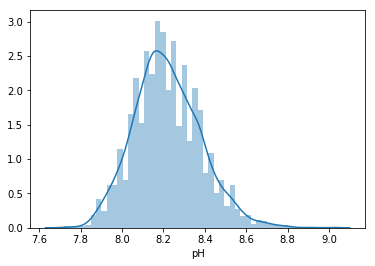

In [6]:
sns.distplot(cookies['pH'])

# Bake temp

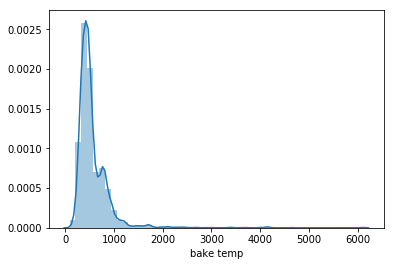

In [7]:
sns.distplot(cookies['bake temp'])

In [8]:
cookies['bake temp'].describe()

count    5174.000000
mean      559.698492
std       353.455432
min        90.000000
25%       380.000000
50%       470.000000
75%       640.000000
max      6110.000000
Name: bake temp, dtype: float64

As there are many very large values and we can't determine if this is a value intpu mistake, we will consider outliers all values over 5*std dev

In [22]:
limit = cookies['bake temp'].mean() + cookies['bake temp'].std()*5

In [25]:
cookies = cookies[cookies['bake temp'] < limit]

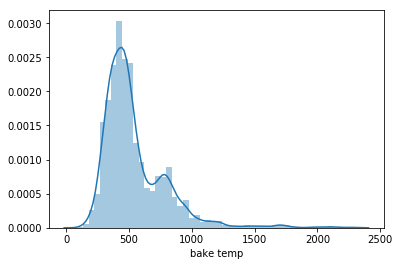

In [26]:
sns.distplot(cookies['bake temp'])

# Density

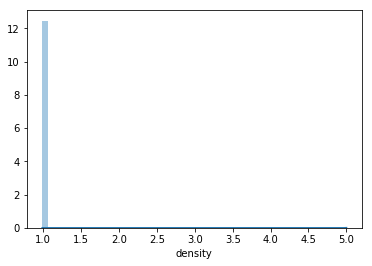

In [28]:
sns.distplot(cookies['density'])

In [29]:
cookies['density'].describe()

count    5142.000000
mean        0.995426
std         0.055934
min         0.987110
25%         0.992280
50%         0.994800
75%         0.996900
max         5.000000
Name: density, dtype: float64

In [32]:
cookies = cookies[cookies['density'] < 3]

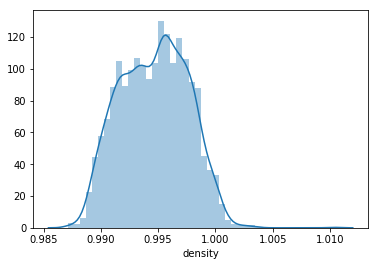

In [33]:
sns.distplot(cookies['density'])

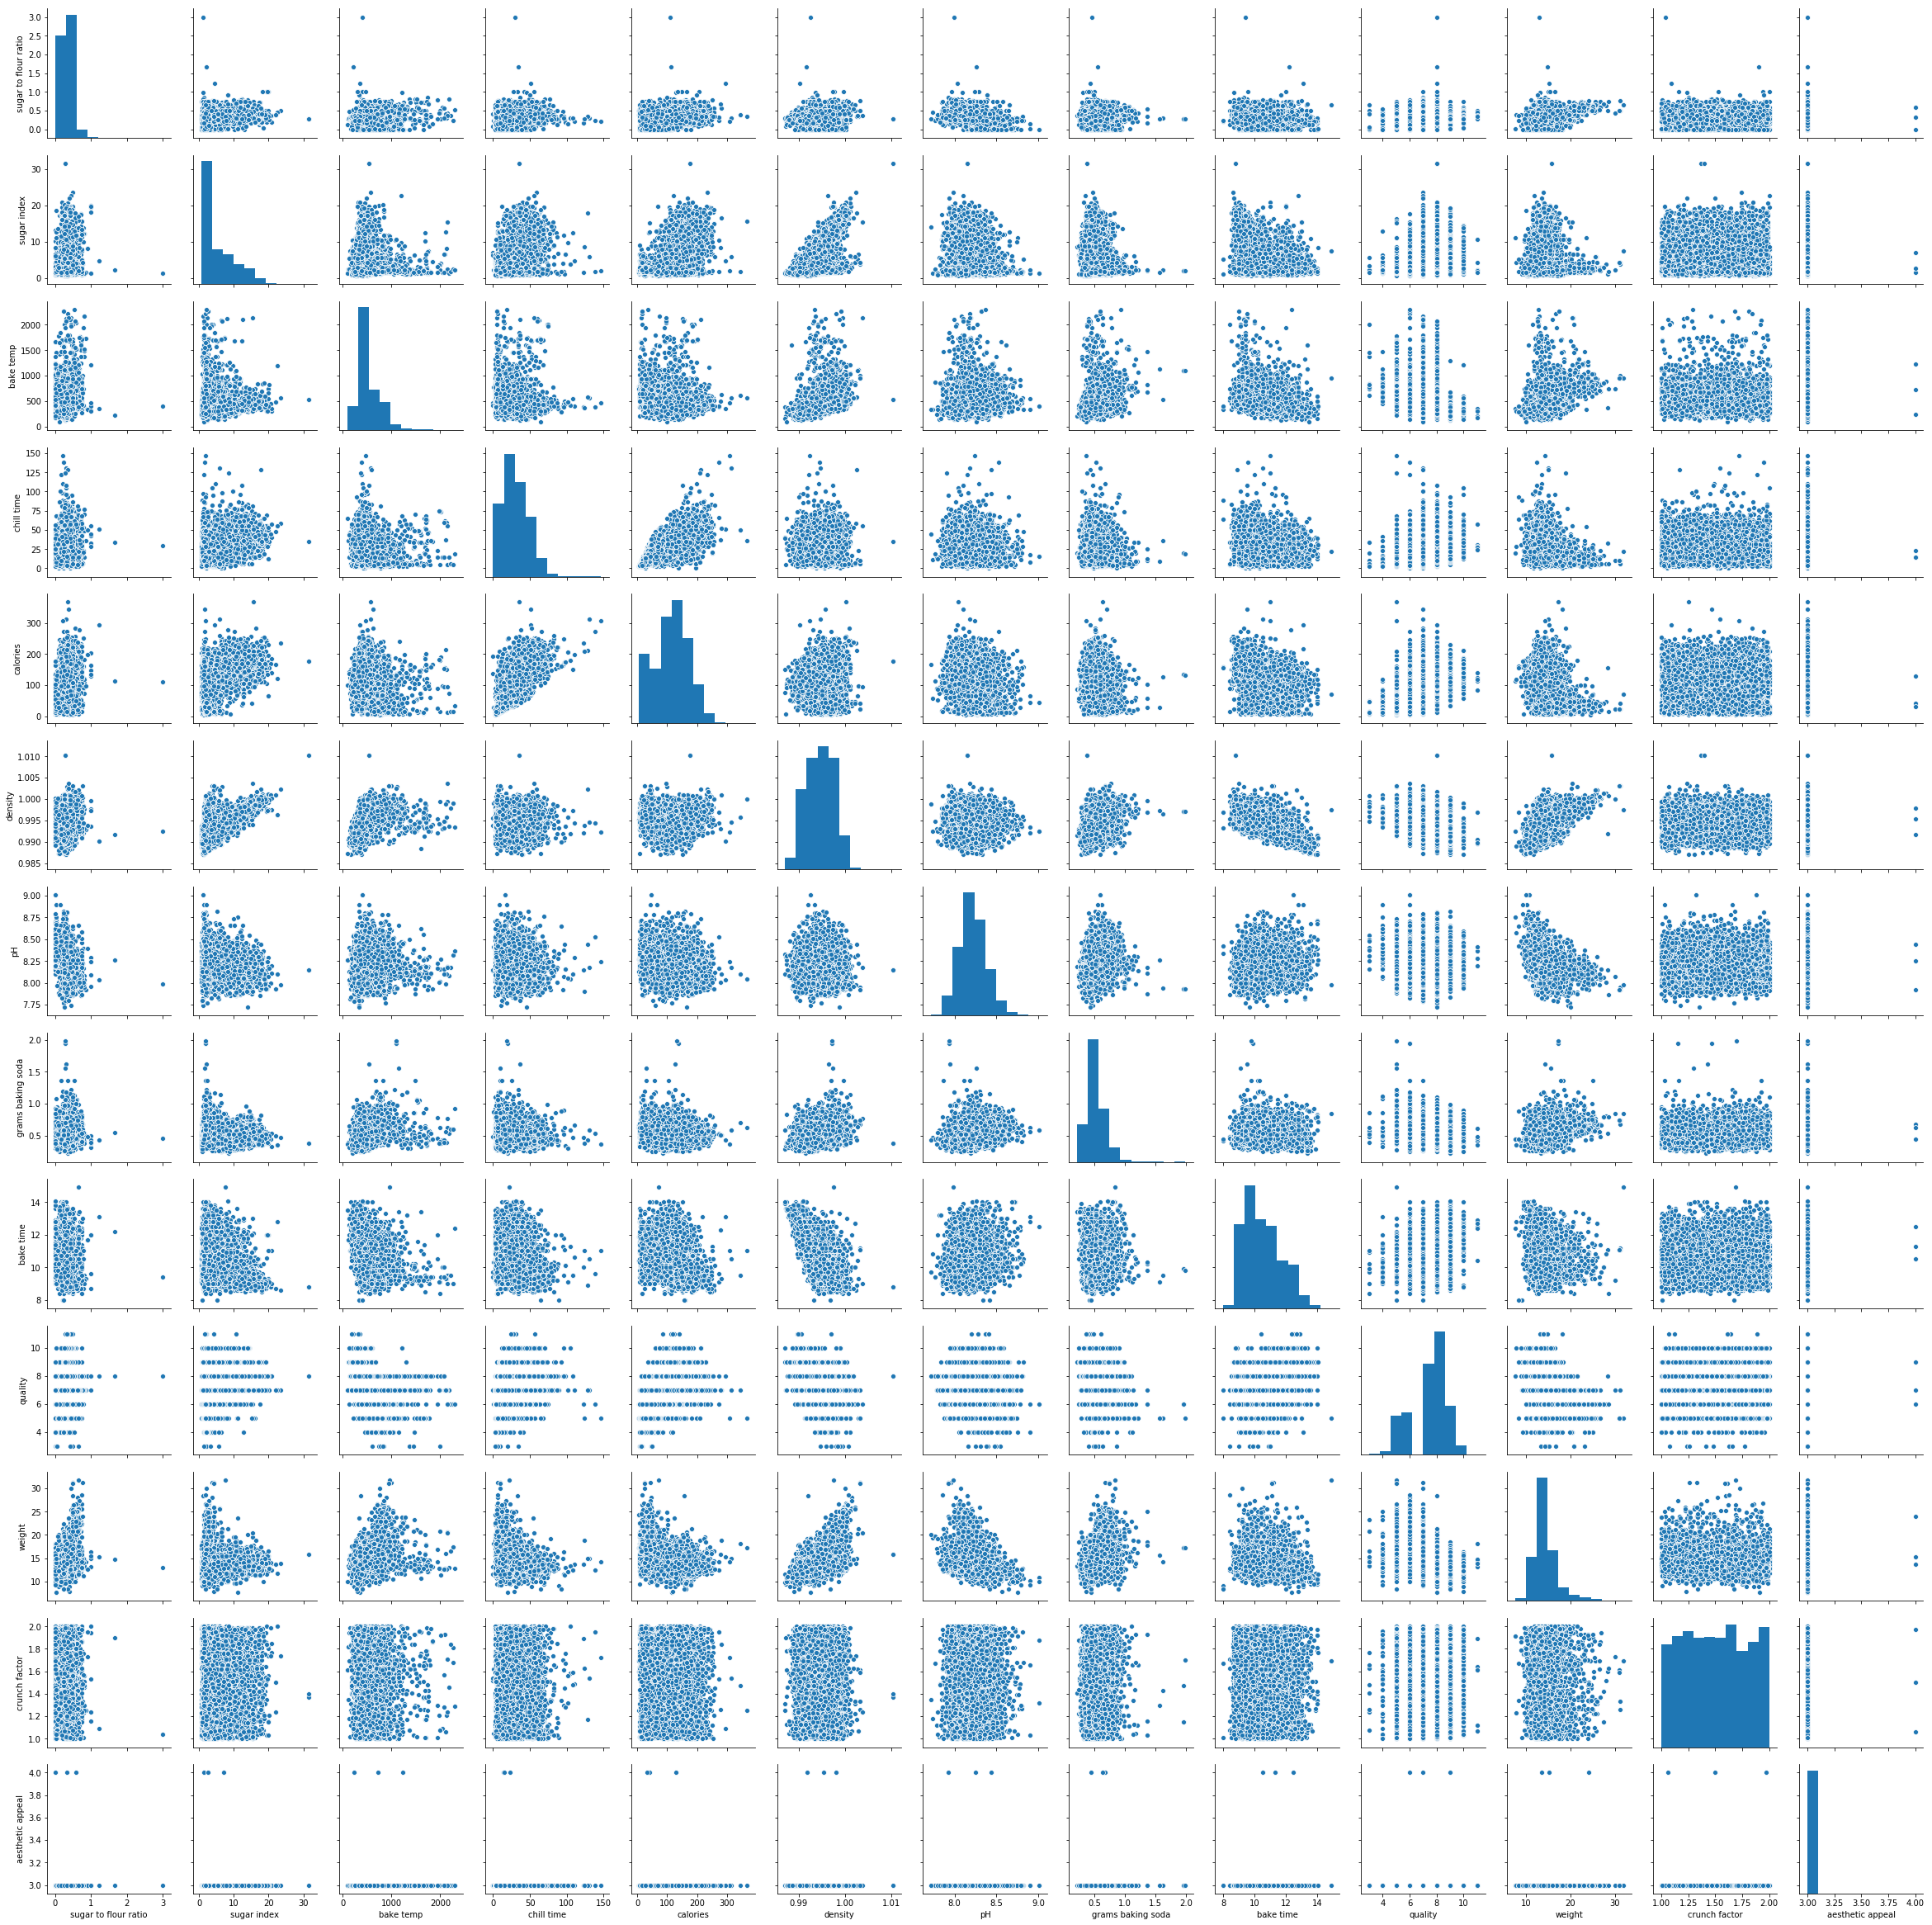

In [42]:
cols = list(cookies.columns[1:14])
sns.pairplot(cookies[cols])

We can see a potential outlier in 'sugar to flour ratio'

# Sugar to flour ratio

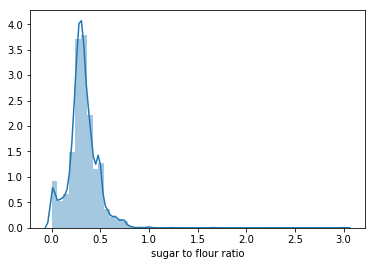

In [46]:
sns.distplot(cookies['sugar to flour ratio'])

In [47]:
cookies['sugar to flour ratio'].describe()

count    5141.000000
mean        0.317273
std         0.149293
min         0.000000
25%         0.240000
50%         0.310000
75%         0.390000
max         3.000000
Name: sugar to flour ratio, dtype: float64

In [54]:
cookies = cookies[cookies['sugar to flour ratio'] < 1.2]

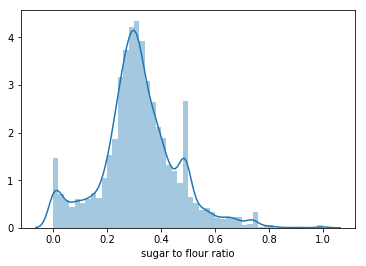

In [55]:
sns.distplot(cookies['sugar to flour ratio'])

In [56]:
cookies.to_csv('clean_cookies_outlier.csv', index=False)